<a href="https://colab.research.google.com/github/atinvento100/Fake_Property_Review_Detection/blob/main/Final_Year_Project(Fake_Property_Review_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud
!pip install texthero
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import texthero as hero
warnings.filterwarnings('ignore')
%matplotlib inline

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

import scipy.stats as stats
from mlxtend.evaluate import ftest

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans


from sklearn import metrics
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from mlxtend.evaluate import cochrans_q

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Data Cleaning**

In [ ]:
df = pd.read_csv("/content/sample_data/PROPERTY_REVIEW_DATASET.csv")
df

,date,reviewer,review,rating,is_real_review
0,9/19/2017\nUpdated review,Barry W.,Horrible experience...Do not believe anything ...,1,0
1,10/18/2011,Lynn H.,If you enjoy stepping in dog pooh on a daily b...,1,0
2,9/18/2019,Augustine ..,My first Apartment and definitely not planning...,5,0
3,1/13/2017,Natasha M.,I lived at the Ancelle for the past year and a...,5,0
4,3/15/2019,Vesna L.,Absolutely horrible experience. Do not listen ...,1,0
...,...,...,...,...,...
3207,18/08/2020,Guest User,"PS Arham is a very good project, which offers ...",3,1
3208,26/02/2015,Bhuvnesh,?,5,1
3209,20/08/2020,Guest User,Ideal Lakeview by The Ideal Group located at T...,4,1
3210,20/08/2020,Guest User,Ideal Lakeview by The Ideal Group located at T...,4,1


In [ ]:
df = df[df['review'] != '?']
df=df[df['reviewer']!='Xx M.']
df.head(10)

,date,reviewer,review,rating,is_real_review
0,9/19/2017\nUpdated review,Barry W.,Horrible experience...Do not believe anything ...,1,0
1,10/18/2011,Lynn H.,If you enjoy stepping in dog pooh on a daily b...,1,0
2,9/18/2019,Augustine ..,My first Apartment and definitely not planning...,5,0
3,1/13/2017,Natasha M.,I lived at the Ancelle for the past year and a...,5,0
4,3/15/2019,Vesna L.,Absolutely horrible experience. Do not listen ...,1,0
6,10/23/2021,Sun Non D.,"so disgusting , guest parking cost is 2$ per h...",1,0
7,7/5/2020,Keosily N.,Poor management. \nI had to break the lease a...,1,0
8,7/21/2021,Jezreel T.,Loved that they showed up with mask and shoe c...,5,0
9,2/1/2021,Paul B.,Love this building. Caroline & Olga in the off...,5,0
10,8/30/2019,Anthony S.,One more happy customer here.\nThis building h...,5,0


In [ ]:
x1 = df[df['date'].str.contains("\nUpdated review") == False]
x1

,date,reviewer,review,rating,is_real_review
1,10/18/2011,Lynn H.,If you enjoy stepping in dog pooh on a daily b...,1,0
2,9/18/2019,Augustine ..,My first Apartment and definitely not planning...,5,0
3,1/13/2017,Natasha M.,I lived at the Ancelle for the past year and a...,5,0
4,3/15/2019,Vesna L.,Absolutely horrible experience. Do not listen ...,1,0
6,10/23/2021,Sun Non D.,"so disgusting , guest parking cost is 2$ per h...",1,0
...,...,...,...,...,...
3204,12/07/2020,Guest User,We are the proud owners of this 2 bhk apartmen...,5,1
3206,18/08/2020,Guest User,"PS Arham is a very good project, which offers ...",3,1
3207,18/08/2020,Guest User,"PS Arham is a very good project, which offers ...",3,1
3209,20/08/2020,Guest User,Ideal Lakeview by The Ideal Group located at T...,4,1


In [ ]:
x2 = df.loc[df['date'].str.contains("\nUpdated review", case=False)]
x2['date'] = x2.date.str.split("\n",expand=True)
x2

,date,reviewer,review,rating,is_real_review
0,9/19/2017,Barry W.,Horrible experience...Do not believe anything ...,1,0
72,6/5/2019,Luna A.,Park Catalina is a Grea place to live\nNelson ...,5,0
81,8/26/2020,Jennifer C.,So I was up for renewal and started looking el...,5,0
149,4/8/2020,M.M L.,"I love how my review is ""not recommend"" by yel...",1,0
150,4/2/2020,Johnny S.,Excuses Excuses Excuses....\nYour lack of shit...,1,0
151,4/8/2019,Cynthia L.,"I see they have updated the community manager,...",2,0
159,12/1/2017,Godo S.,"LUXURY - yet affordable ... sleek, modern and ...",5,0
184,9/30/2019,Sparkling Cleaning S.,Location! I love the location of these apartme...,5,0
198,11/15/2016,Lisa P.,I lived at the Valley Apartments for almost 10...,5,0
214,4/5/2017,Brian L.,Just classic. I came back to yelp to see if th...,1,0


In [ ]:
frames=[x1,x2]
data=pd.concat(frames)
data=data.drop_duplicates()
data

,date,reviewer,review,rating,is_real_review
1,10/18/2011,Lynn H.,If you enjoy stepping in dog pooh on a daily b...,1,0
2,9/18/2019,Augustine ..,My first Apartment and definitely not planning...,5,0
3,1/13/2017,Natasha M.,I lived at the Ancelle for the past year and a...,5,0
4,3/15/2019,Vesna L.,Absolutely horrible experience. Do not listen ...,1,0
6,10/23/2021,Sun Non D.,"so disgusting , guest parking cost is 2$ per h...",1,0
...,...,...,...,...,...
1047,3/17/2017,Victoria K.,Jack (the newest member of the team) is also v...,5,0
1059,7/31/2020,Current 2000 Post Tenant X.,"Up to 101 vacancies now, an increase from 66 j...",1,0
1060,8/18/2015,Colin D.,"Overall, our year stay at 2000 Post was horrib...",1,0
1077,4/4/2018,William C.,been here 16 years so I obviously like the bui...,5,0


In [ ]:
data.shape

(1767, 5)

In [ ]:
data.isnull().sum()

date              0
reviewer          0
review            0
rating            0
is_real_review    0
dtype: int64

In [ ]:
data.dtypes

date              object
reviewer          object
review            object
rating             int64
is_real_review     int64
dtype: object

In [ ]:
data.describe()

,rating,is_real_review
count,1767.000000,1767.000000
mean,4.302773,0.380872
std,1.203293,0.485739
min,0.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,1.000000


## **Visualization**

**is_real_review attribute:** 

0 for Fake

1 for Real

In [ ]:
date = len(data['date'].unique())
usercount = len(data['reviewer'].unique())
rating  = data['rating'].unique()
review_type = data['is_real_review'].unique()
print("Count of the dates on which reviews where posted: ",date)
print("Number of users who posted reviews: ",usercount)
print("Rating types: ",rating)
print("Review Type: ",review_type)

print("-------------------------------")

genuine_review = len(data[data['is_real_review']==1])
fake_review = len(data[data['is_real_review']==0])
print("Count of Genuine Reviews: ",genuine_review)
print("Count of Fake Reviews: ",fake_review)

print("-------------------------------")

Count of the dates on which reviews where posted:  966
Number of users who posted reviews:  1056
Rating types:  [1 5 4 2 3 0]
Review Type:  [0 1]
-------------------------------
Count of Genuine Reviews:  673
Count of Fake Reviews:  1094
-------------------------------


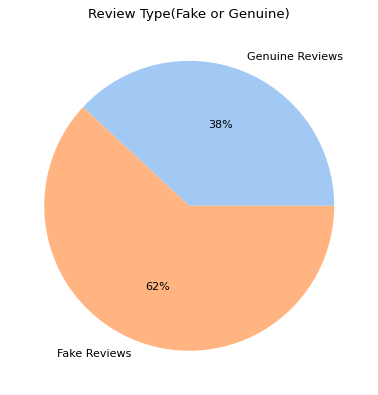

In [ ]:
#Pie Chart
figure(figsize=(8, 6), dpi=80)
reviewCount = [genuine_review,fake_review]
labels = ['Genuine Reviews', 'Fake Reviews']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(reviewCount, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Review Type(Fake or Genuine)")
plt.show()

In [ ]:
#Date vs Review Count
dateVSreview = (data.groupby(['date', 'is_real_review']).size().sort_values(ascending=True).reset_index(name='count') )
dateVSreview.max()

date              9/9/2018
is_real_review           1
count                   38
dtype: object

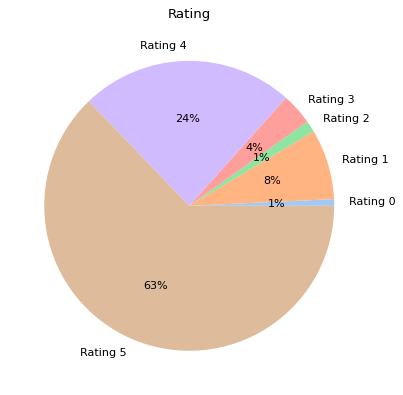

In [ ]:
#Rating Pie Chart
figure(figsize=(8, 6), dpi=80)
rating0 = len(data[data['rating']==0])
rating1 = len(data[data['rating']==1])
rating2 = len(data[data['rating']==2])
rating3 = len(data[data['rating']==3])
rating4 = len(data[data['rating']==4])
rating5 = len(data[data['rating']==5])

ratingCount = [rating0,rating1,rating2,rating3,rating4,rating5]
labels = ['Rating 0','Rating 1','Rating 2','Rating 3','Rating 4','Rating 5']

colors = sns.color_palette('pastel')[0:7]

plt.pie(ratingCount, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Rating")
plt.show()

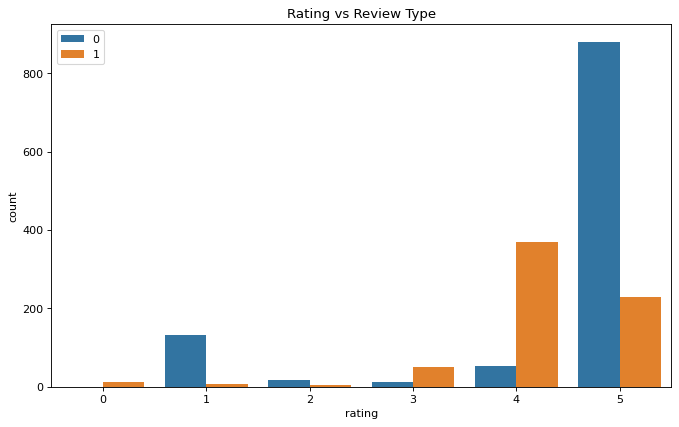

In [ ]:
#Rating vs Type of Review Count
figure(figsize=(10,6), dpi=80)
ratingVSreview = (data.groupby(['rating', 'is_real_review']).size().sort_values(ascending=False).reset_index(name='count') )
sns.barplot(x = ratingVSreview['rating'], y = ratingVSreview['count'], hue = ratingVSreview['is_real_review'], data = ratingVSreview)
plt.legend(loc='upper left')
plt.title("Rating vs Review Type")
plt.show()

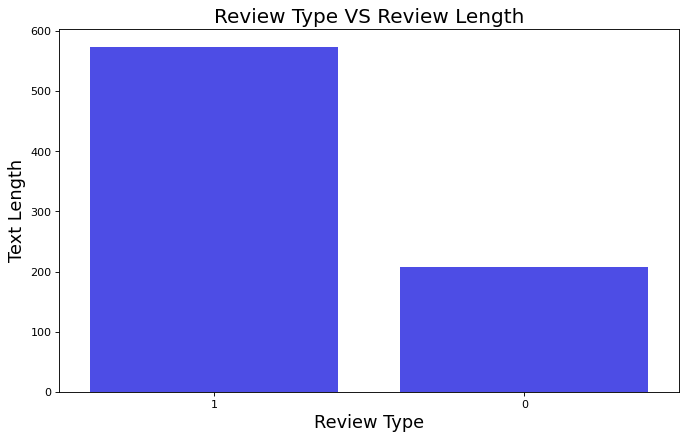

In [ ]:
#Review Type VS Review Length
temp = data.groupby("is_real_review").review
data['TEXT_LENGTH'] = data['review'].apply(len)
temp_len = data.groupby(["is_real_review"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))

figure(figsize=(10,6), dpi=80)
sns.barplot(temp_len.index, temp_len.values, alpha=0.8, color='blue')
plt.ylabel('Text Length', fontsize=16)
plt.xlabel('Review Type', fontsize=16)
plt.title('Review Type VS Review Length', fontsize=18)
plt.xticks(rotation='horizontal')
plt.xticks([0, 1], [1,0])
plt.show()

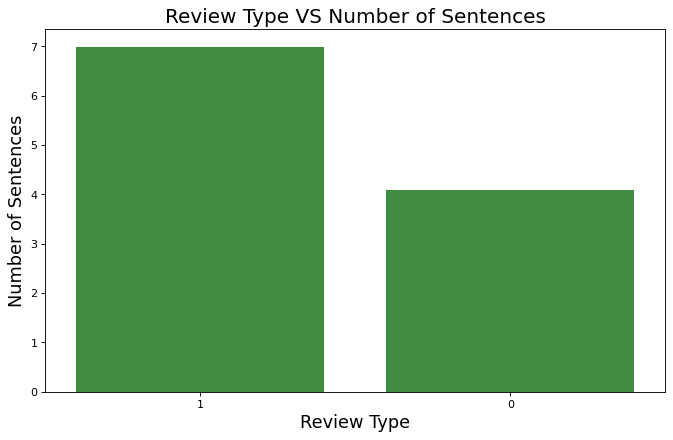

In [ ]:
#Review Type VS Number of Sentences
temp = data.groupby("is_real_review").review
data['num_sentences'] = data['review'].apply(lambda x: len(str(x).split('.')))
temp_len = data.groupby(["is_real_review"]).num_sentences.agg(lambda x: sum(x)/len(x))

figure(figsize=(10,6), dpi=80)
sns.barplot(temp_len.index, temp_len.values, alpha=0.8, color='green')
plt.ylabel('Number of Sentences', fontsize=16)
plt.xlabel('Review Type', fontsize=16)
plt.title('Review Type VS Number of Sentences', fontsize=18)
plt.xticks(rotation='horizontal')
plt.xticks([0, 1], [1,0])
plt.show()

<Figure size 800x800 with 0 Axes>

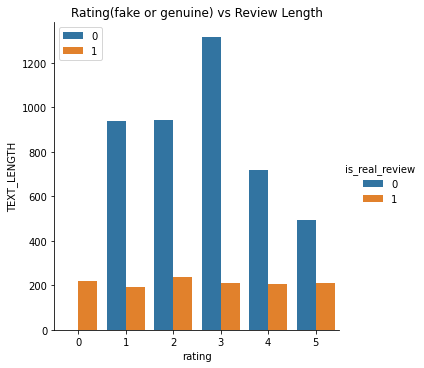

In [ ]:
#Rating Count
figure(figsize=(10,10), dpi=80)

rating_text_length = data.groupby(["rating","is_real_review"],as_index=False).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
rating_text_length = pd.DataFrame(rating_text_length)
sns.factorplot(x='rating', y='TEXT_LENGTH', hue='is_real_review', data=rating_text_length, kind='bar')

plt.legend(loc='upper left')
plt.title("Rating(fake or genuine) vs Review Length")
plt.show()

## **Word Cloud**

In [ ]:
def word_cloud_func(df,comment_words,stopwords): 
  for val in df:
      
      val = str(val)
  
      tokens = val.split()
      
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  return wordcloud

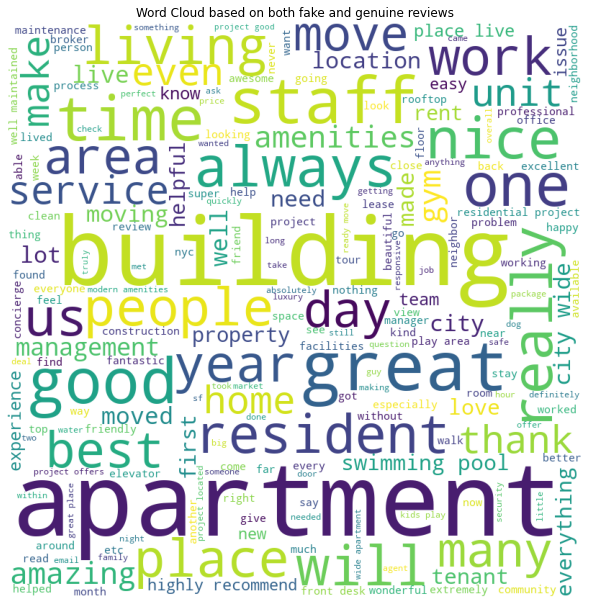

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud_func(data['review'],'',set(STOPWORDS)))
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud based on both fake and genuine reviews") 
plt.show()

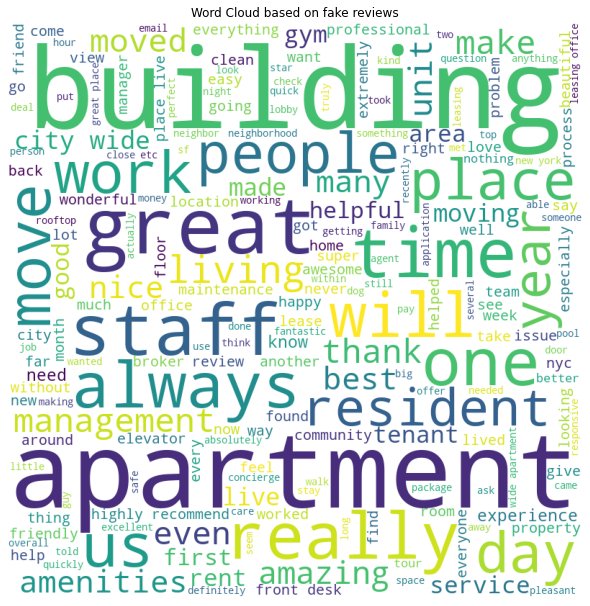

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud_func(data[data['is_real_review']==0].review,'',set(STOPWORDS)))
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud based on fake reviews") 
plt.show()

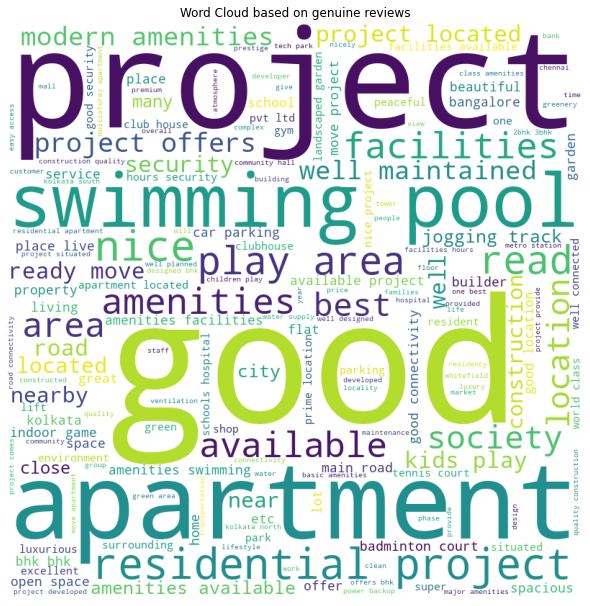

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud_func(data[data['is_real_review']==1].review,'',set(STOPWORDS)))
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud based on genuine reviews") 
plt.show()


## **Data Preprocessing**



In [ ]:
#tokenization
data['REVIEW_tokeni'] = data['review'].apply(word_tokenize)
data.head(2)

,date,reviewer,review,rating,is_real_review,REVIEW_tokeni
1,10/18/2011,Lynn H.,If you enjoy stepping in dog pooh on a daily b...,1,0,"[If, you, enjoy, stepping, in, dog, pooh, on, ..."
2,9/18/2019,Augustine ..,My first Apartment and definitely not planning...,5,0,"[My, first, Apartment, and, definitely, not, p..."


In [ ]:
# removing punctuation marks
import string
data['REVIEW_wo_punctuation'] = data['REVIEW_tokeni'].apply(lambda x: [char for char in x if char not in string.punctuation])
data.head(2)

,date,reviewer,review,rating,is_real_review,REVIEW_tokeni,REVIEW_wo_punctuation
1,10/18/2011,Lynn H.,If you enjoy stepping in dog pooh on a daily b...,1,0,"[If, you, enjoy, stepping, in, dog, pooh, on, ...","[If, you, enjoy, stepping, in, dog, pooh, on, ..."
2,9/18/2019,Augustine ..,My first Apartment and definitely not planning...,5,0,"[My, first, Apartment, and, definitely, not, p...","[My, first, Apartment, and, definitely, not, p..."


In [ ]:
#removing stop words
data['REVIEW_filtered'] = data['REVIEW_wo_punctuation'].apply(lambda x: [word for word in x if not word in stop_words])
data.head(2)

,date,reviewer,review,rating,is_real_review,REVIEW_tokeni,REVIEW_wo_punctuation,REVIEW_filtered
1,10/18/2011,Lynn H.,If you enjoy stepping in dog pooh on a daily b...,1,0,"[If, you, enjoy, stepping, in, dog, pooh, on, ...","[If, you, enjoy, stepping, in, dog, pooh, on, ...","[If, enjoy, stepping, dog, pooh, daily, basis,..."
2,9/18/2019,Augustine ..,My first Apartment and definitely not planning...,5,0,"[My, first, Apartment, and, definitely, not, p...","[My, first, Apartment, and, definitely, not, p...","[My, first, Apartment, definitely, planning, l..."


In [ ]:
#Stemming
ps = PorterStemmer()
data['REVIEW_s'] = data['REVIEW_filtered'].apply(lambda x: ' '.join([ps.stem(i) for i in x]))
data.head(2)

,date,reviewer,review,rating,is_real_review,REVIEW_tokeni,REVIEW_wo_punctuation,REVIEW_filtered,REVIEW_s
1,10/18/2011,Lynn H.,If you enjoy stepping in dog pooh on a daily b...,1,0,"[If, you, enjoy, stepping, in, dog, pooh, on, ...","[If, you, enjoy, stepping, in, dog, pooh, on, ...","[If, enjoy, stepping, dog, pooh, daily, basis,...",If enjoy step dog pooh daili basi insid build ...
2,9/18/2019,Augustine ..,My first Apartment and definitely not planning...,5,0,"[My, first, Apartment, and, definitely, not, p...","[My, first, Apartment, and, definitely, not, p...","[My, first, Apartment, definitely, planning, l...",My first apart definit plan leav soon place we...


In [ ]:
#Lemmatization
lemma = WordNetLemmatizer()
data['REVIEW_lemm'] = data['REVIEW_s'].apply(lambda x: ' '.join([lemma.lemmatize(i) for i in x]))
data.head(2)

,date,reviewer,review,rating,is_real_review,REVIEW_tokeni,REVIEW_wo_punctuation,REVIEW_filtered,REVIEW_s,REVIEW_lemm
1,10/18/2011,Lynn H.,If you enjoy stepping in dog pooh on a daily b...,1,0,"[If, you, enjoy, stepping, in, dog, pooh, on, ...","[If, you, enjoy, stepping, in, dog, pooh, on, ...","[If, enjoy, stepping, dog, pooh, daily, basis,...",If enjoy step dog pooh daili basi insid build ...,I f e n j o y s t e p d o g p o o h ...
2,9/18/2019,Augustine ..,My first Apartment and definitely not planning...,5,0,"[My, first, Apartment, and, definitely, not, p...","[My, first, Apartment, and, definitely, not, p...","[My, first, Apartment, definitely, planning, l...",My first apart definit plan leav soon place we...,M y f i r s t a p a r t d e f i n i t ...


## **Common words in fake and genuine reviews**

In [ ]:
common_words = set()
fakecount=[]
genuinecount=[]

for i in data['REVIEW_filtered']:
  for j in i:
    temp=j.lower()
    common_words.add(temp)

fake = data[data['is_real_review']==0]
genuine = data[data['is_real_review']==1]

for i in common_words:
  c=0
  
  for j in fake['REVIEW_filtered']:
    j = list(map(str.lower,j))
    t = set(j)
    if(i.lower() in t):
      c+=1
  fakecount.append(c)
  
for i in common_words:
  c=0
  
  for j in genuine['REVIEW_filtered']:
    j = list(map(str.lower,j))
    t = set(j)
    if(i.lower() in t):
      c+=1
  genuinecount.append(c)

print(len(common_words))
print(len(fakecount))
print(len(genuinecount))

common_words = list(common_words)
dftemp = {"common_words":common_words, "fake_count": fakecount, "genuine_count": genuinecount}
commonwords_df = pd.DataFrame(dftemp)
commonwords_df    

8316
8316
8316


,common_words,fake_count,genuine_count
0,encountered,3,0
1,nick,8,0
2,service/maintenance,1,0
3,gut,1,0
4,-10,1,0
...,...,...,...
8311,convert,1,0
8312,latrina,1,0
8313,causes,2,0
8314,2011,1,1


In [ ]:
tempfake=[]
tempgenuine=[]
for i in common_words:
  c=0
  
  for j in fake['REVIEW_filtered']:
    j = list(map(str.lower,j))
    t = set(j)
    if(i.lower() in t):
      tempfake.append(t)  

for i in common_words:
  c=0
  
  for j in genuine['REVIEW_filtered']:
    j = list(map(str.lower,j))
    t = set(j)
    if(i.lower() in t):
      tempgenuine.append(t)  
tempfake = pd.DataFrame({"fake": tempfake})
tempgenuine = pd.DataFrame({"genuine": tempgenuine})

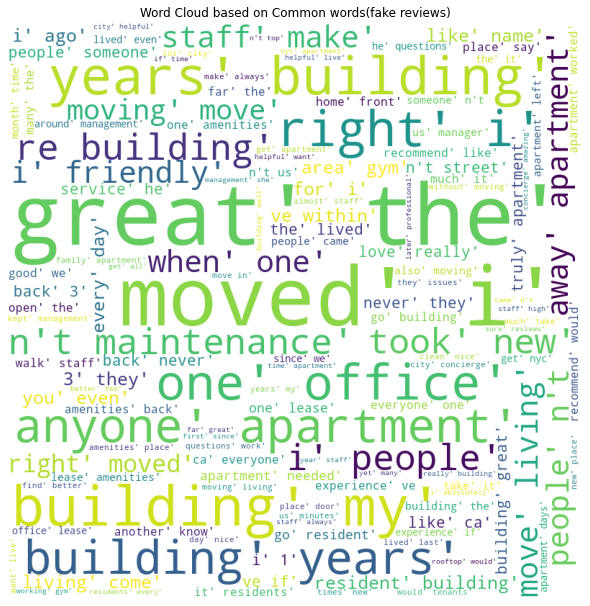

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud_func(tempfake.fake,'',set(STOPWORDS)))
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud based on Common words(fake reviews)") 
plt.show()

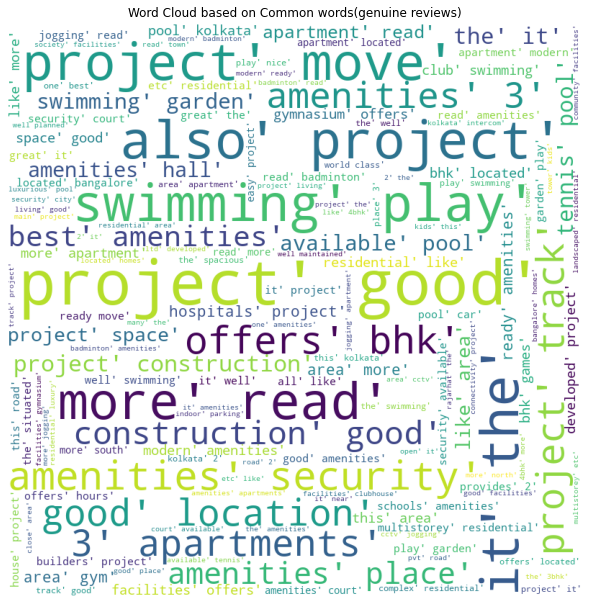

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud_func(tempgenuine.genuine,'',set(STOPWORDS)))
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud based on Common words(genuine reviews)") 
plt.show()

In [ ]:
data['pca'] =  (
    data['REVIEW_s']
    .pipe(hero.clean)
    .pipe(hero.tfidf)
    .pipe(hero.pca)
)

hero.scatterplot(data,'pca',color='is_real_review',title="Property Reviews")

## **Test Train Split**

In [ ]:
X = data['REVIEW_s']
y = data['is_real_review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1236,)
(531,)
(1236,)
(531,)


In [ ]:
#CountVectorization
vector = CountVectorizer()

#it 'learns' the vocabulary and builds a matrix:
vector.fit(X_train) 
X_train = vector.transform(X_train)

#apply same on test database
X_test = vector.transform(X_test)

## **Applying Various Machine Learning Models**

### **Naive Bayes**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       332
           1       0.98      0.99      0.99       199

    accuracy                           0.99       531
   macro avg       0.99      0.99      0.99       531
weighted avg       0.99      0.99      0.99       531

ROC AUC score: 0.9997426893503663
accuracy:0.9905838041431262
-----------------------------------------------------




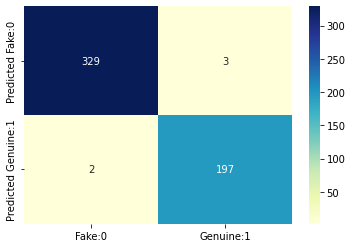

In [ ]:
NBayes = MultinomialNB()
NBS=NBayes.fit(X_train, y_train)
y_pred1 = NBayes.predict(X_test)
NBS_cm = confusion_matrix(y_test, y_pred1)
y_prob = NBayes.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred1))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print(f'accuracy:{metrics.accuracy_score(y_test, y_pred1)}')
print('-----------------------------------------------------')
print('')
print('')
cm_matrix = pd.DataFrame(data=NBS_cm, columns=['Fake:0','Genuine:1'], 
                                 index=['Predicted Fake:0','Predicted Genuine:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### **Random Forest**

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       332
           1       0.99      0.96      0.98       199

    accuracy                           0.98       531
   macro avg       0.99      0.98      0.98       531
weighted avg       0.99      0.98      0.98       531

ROC AUC score: 0.9995610583035661
accuracy:0.9849340866290018
-----------------------------------------------------




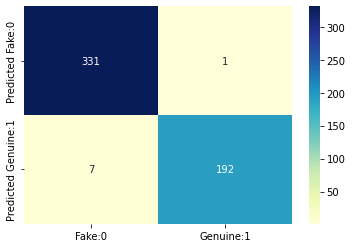

In [ ]:
clf = RandomForestClassifier(n_estimators = 100) 
RF=clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
RF_cm = confusion_matrix(y_test, y_pred2)
y_prob1 = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred2))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob1)}')
print(f'accuracy:{metrics.accuracy_score(y_test, y_pred2)}')
print('-----------------------------------------------------')
print('')
print('')
RF_cm_matrix = pd.DataFrame(data=RF_cm, columns=['Fake:0','Genuine:1'], 
                                 index=['Predicted Fake:0','Predicted Genuine:1'])

sns.heatmap(RF_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.984885 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.970854 (0.012869) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.983537 (0.010557) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.984885 (0.010189) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.968448 (0.014817) with: {'max_features': 'log2', 'n_estimators': 10}
0.984076 (0.012105) with: {'max_features': 'log2', 'n_estimators': 100}
0.984074 (0.010970) with: {'max_features': 'log2', 'n_estimators': 1000}


### **SVM**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       332
           1       0.98      0.97      0.98       199

    accuracy                           0.98       531
   macro avg       0.98      0.98      0.98       531
weighted avg       0.98      0.98      0.98       531

ROC AUC score: 0.9993037476539324
accuracy:0.9849340866290018
-----------------------------------------------------




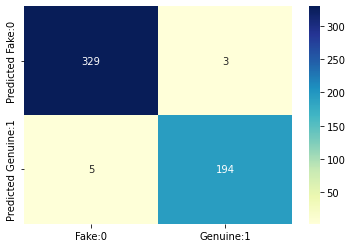

In [ ]:
svm_clf = svm.SVC(probability=True)
svm_clf.fit(X_train, y_train)
y_pred3 = svm_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred3)
SVM_cm = confusion_matrix(y_test, y_pred3)
y_prob2 = svm_clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred3))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob2)}')
print(f'accuracy:{metrics.accuracy_score(y_test, y_pred3)}')
print('-----------------------------------------------------')
print('')
print('')
SVM_cm_matrix = pd.DataFrame(data=SVM_cm, columns=['Fake:0','Genuine:1'], 
                                 index=['Predicted Fake:0','Predicted Genuine:1'])

sns.heatmap(SVM_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
model = svm.SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.983272 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.920701 (0.019526) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.982730 (0.009971) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.966817 (0.019656) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.943094 (0.019954) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.982461 (0.009827) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.961124 (0.022998) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.831959 (0.031314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.980842 (0.010760) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.983272 (0.007527) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.616509 (0.003152) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.961970 (0.014944) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.962514 (0.014399) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.616509 (0.003152) with: {'C': 0.01, 'gamma': 'sca

### **Logistic Regression**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       332
           1       0.98      0.97      0.98       199

    accuracy                           0.98       531
   macro avg       0.98      0.98      0.98       531
weighted avg       0.98      0.98      0.98       531

ROC AUC score: 0.9995156505418659
accuracy:0.9849340866290018
-----------------------------------------------------




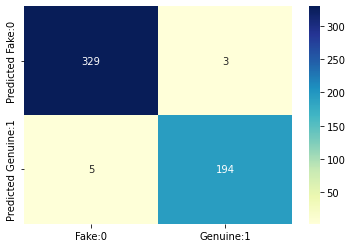

In [ ]:
log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred4 = log_reg.predict(X_test)
logreg_cm = confusion_matrix(y_test, y_pred4)
y_prob3 = log_reg.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred4))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob3)}')
print(f'accuracy:{metrics.accuracy_score(y_test, y_pred4)}')
print('-----------------------------------------------------')
print('')
print('')
logreg_cm_matrix = pd.DataFrame(data=logreg_cm, columns=['Fake:0','Genuine:1'], 
                                 index=['Predicted Fake:0','Predicted Genuine:1'])

sns.heatmap(logreg_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Hyperparameter Tuning


model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.984076 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.981659 (0.009550) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.981659 (0.009550) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.981390 (0.009601) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.982197 (0.010098) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.982197 (0.010098) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.983003 (0.010305) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.983534 (0.009011) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983534 (0.009011) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.984076 (0.010565) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.983799 (0.010488) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983799 (0.010488) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.983530 (0.010378) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.976521 (0.011353) wit

### **XGBoost**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       332
           1       0.98      0.97      0.98       199

    accuracy                           0.98       531
   macro avg       0.98      0.98      0.98       531
weighted avg       0.98      0.98      0.98       531

ROC AUC score: 0.9995156505418659
accuracy:0.9849340866290018
-----------------------------------------------------




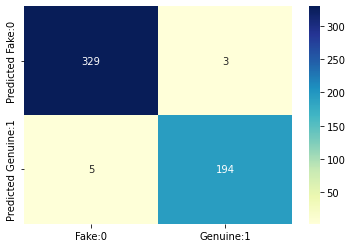

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred5 = log_reg.predict(X_test)
logreg_cm = confusion_matrix(y_test, y_pred5)
y_prob4 = log_reg.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred5))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob4)}')
print(f'accuracy:{metrics.accuracy_score(y_test, y_pred5)}')
print('-----------------------------------------------------')
print('')
print('')
logreg_cm_matrix = pd.DataFrame(data=logreg_cm, columns=['Fake:0','Genuine:1'], 
                                 index=['Predicted Fake:0','Predicted Genuine:1'])

sns.heatmap(logreg_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## **Evaluation of models**

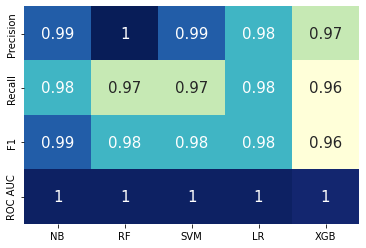

In [ ]:
results = pd.DataFrame(columns = ['NB', 'RF', 'SVM', 'LR','XGB'], index = range(4))
results.iloc[0, 0] = round(cross_val_score(NBayes, X_train, y_train, cv = 10, scoring = 'precision').mean(), 2)
results.iloc[1, 0] = round(cross_val_score(NBayes, X_train, y_train, cv = 10, scoring = 'recall').mean(), 2)
results.iloc[2, 0] = round(cross_val_score(NBayes, X_train, y_train, cv = 10, scoring = 'f1').mean(), 2)
results.iloc[3, 0] = round(cross_val_score(NBayes, X_train, y_train, cv = 10, scoring = 'roc_auc').mean(), 3)

results.iloc[0, 1] = round(cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'precision').mean(), 2)
results.iloc[1, 1] = round(cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'recall').mean(), 2)
results.iloc[2, 1] = round(cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'f1').mean(), 2)
results.iloc[3, 1] = round(cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'roc_auc').mean(), 3)

results.iloc[0, 2] = round(cross_val_score(svm_clf, X_train, y_train, cv = 10, scoring = 'precision').mean(), 2)
results.iloc[1, 2] = round(cross_val_score(svm_clf, X_train, y_train, cv = 10, scoring = 'recall').mean(), 2)
results.iloc[2, 2] = round(cross_val_score(svm_clf, X_train, y_train, cv = 10, scoring = 'f1').mean(), 2)
results.iloc[3, 2] = round(cross_val_score(svm_clf, X_train, y_train, cv = 10, scoring = 'roc_auc').mean(), 3)

results.iloc[0, 3] = round(cross_val_score(log_reg, X_train, y_train, cv = 10, scoring = 'precision').mean(), 2)
results.iloc[1, 3] = round(cross_val_score(log_reg, X_train, y_train, cv = 10, scoring = 'recall').mean(), 2)
results.iloc[2, 3] = round(cross_val_score(log_reg, X_train, y_train, cv = 10, scoring = 'f1').mean(), 2)
results.iloc[3, 3] = round(cross_val_score(log_reg, X_train, y_train, cv = 10, scoring = 'roc_auc').mean(), 3)

results.iloc[0, 4] = round(cross_val_score(xgb, X_train, y_train, cv = 10, scoring = 'precision').mean(), 2)
results.iloc[1, 4] = round(cross_val_score(xgb, X_train, y_train, cv = 10, scoring = 'recall').mean(), 2)
results.iloc[2, 4] = round(cross_val_score(xgb, X_train, y_train, cv = 10, scoring = 'f1').mean(), 2)
results.iloc[3, 4] = round(cross_val_score(xgb, X_train, y_train, cv = 10, scoring = 'roc_auc').mean(), 3)

#Conclusion
sns.heatmap(results[results.columns.to_list()].astype(float), annot = True, cmap='YlGnBu',cbar = False, annot_kws = {'fontsize': 15},yticklabels = ['Precision', 'Recall', 'F1', 'ROC AUC']);

## **Statistical Analysis**

### **T Test**

### **1. Null Hypothesis - Short Length Reviews are said to be mostly Fake while long length Reviews are said to Genuine.**

In [ ]:
genuine_length = data[data['is_real_review']==1]
fake_length = data[data['is_real_review']==0]
temp_data = data.groupby(["is_real_review"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
print( "Mean Fake Review Length",temp_data[1] )
print( "Mean Genuine Review Length",temp_data[0])
print( "Mean Review Length",data['TEXT_LENGTH'].mean() )

Mean Fake Review Length 207.3224368499257
Mean Genuine Review Length 574.0749542961609
Mean Review Length 434.38936049801924


In [ ]:
stats.ttest_1samp(a = genuine_length['TEXT_LENGTH'],               # Sample data
                 popmean = data['TEXT_LENGTH'].mean())  # Pop mean

Ttest_1sampResult(statistic=-94.05459374029115, pvalue=0.0)

In [ ]:
stats.ttest_1samp(a = fake_length['TEXT_LENGTH'],               # Sample data
                 popmean = data['TEXT_LENGTH'].mean())  # Pop mean

Ttest_1sampResult(statistic=8.575551264303263, pvalue=3.328609468507102e-17)

In [ ]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=genuine_length.shape[0]-1)  # Degrees of freedom

-1.9635004087097414

In [ ]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=genuine_length.shape[0]-1)  # Degrees of freedom

1.963500408709741

In [ ]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=fake_length.shape[0]-1)  # Degrees of freedom

-1.962136771101666

In [ ]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=fake_length.shape[0]-1)  # Degrees of freedom

1.9621367711016655

**We reject the null Hypothesis and accept the alternate hypothesis**

### **2. Null Hypothesis: Fake Reviews mostly have high rating**

In [ ]:
rating_count0 = ratingVSreview[ratingVSreview['is_real_review']==0]
rating_weight0 = np.average(rating_count0['count'].to_numpy(), weights=rating_count0['rating'].to_numpy())
stats.ttest_1samp(a = rating_count0['count'],               # Sample data
                 popmean = rating_weight0)  # Pop mean

Ttest_1sampResult(statistic=-0.6127341321972002, pvalue=0.5731754557457301)

In [ ]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=rating_count0.shape[0]-1)  # Degrees of freedom

-2.7764451051977996

In [ ]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=rating_count0.shape[0]-1)  # Degrees of freedom

2.7764451051977987

**We accept the Null Hypothesis**

### **F TEST**

Null Hypothesis - No Difference in various Machine Model Performances(Accuracies)

In [ ]:
y_test = np.array(y_test)
y_pred1 = np.array(y_pred1)
y_pred2 = np.array(y_pred2)
y_pred3 = np.array(y_pred3)
y_pred4 = np.array(y_pred4)
y_pred5 = np.array(y_pred5)

f, p_value = ftest(y_test, 
                   y_pred1,
                   y_pred2,
                   y_pred3,
                   y_pred4,
                   y_pred5)

print('F: %.3f' % f)
print('p-value: %.3f' % p_value)

F: 0.620
p-value: 0.648


Since the p-value>alpha(0.05) we conclude that there is no difference between the classification accuracies.We accept the null hypothesis

## **Q - Test**

In [ ]:
q, p_value = cochrans_q(y_test, 
                   y_pred1,
                   y_pred2,
                   y_pred3,
                   y_pred4,
                   y_pred5)

print('Q: %.3f' % q)
print('p-value: %.3f' % p_value)

Q: 2.483
p-value: 0.648


Null Hypothesis - No Difference in various Machine Model Performances(Accuracies)

Since the p-value>alpha(0.05) we conclude that there is no difference between the classification accuracies.We accept the null hypothesis

